In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import pylab as pl
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
countries = pd.read_csv('datasets/cluster_analysis shorten.csv')

In [5]:
from sklearn.impute import KNNImputer
from numpy import isnan
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num = countries.select_dtypes(include=numerics).columns
# split into input and output elements
X = countries[num].values
# print total missing
print('Missing: %d' % sum(isnan(X).flatten()))
# define imputer
imputer = KNNImputer()
# fit on the dataset
imputer.fit(X)
# transform the dataset
Xtrans = imputer.transform(X)
# print total missing
print('Missing: %d' % sum(isnan(Xtrans).flatten()))
total_df = pd.DataFrame()
total_df = total_df.append(pd.DataFrame(Xtrans, columns = num), ignore_index = True)

Missing: 274
Missing: 0


In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

data_sc = pd.DataFrame(scaler.fit_transform(total_df), columns = countries.select_dtypes(include=numerics).columns)

In [7]:
categories = {
    'Socio-economic': [
        'GDP_per_capita', 'Health Exp', 'Alcohol consumption', 'Cigarette consumption', 
        'Life Expectancy', 'Income Gini', 'UHC coverage', 'Population', 'Population Density'
    ],
    'Disease Prevalence': [
        'Tuberculosis cases', 'Cardiovascular', 'Diabetes', 'Respiratory', 'Asthma'
    ],
    'Environmental': [
        'PM2.5 exposure', 'Pollution Death Rate', 'EPI score',
        'Sanitation and Drinking Water', 'Unsafe Water for Drinking'
    ],
    'Political': [
        'Democracy Index', 'Corruption index', 'Human Development Index'
    ]
}

<AxesSubplot:xlabel='UHC coverage', ylabel='Density'>

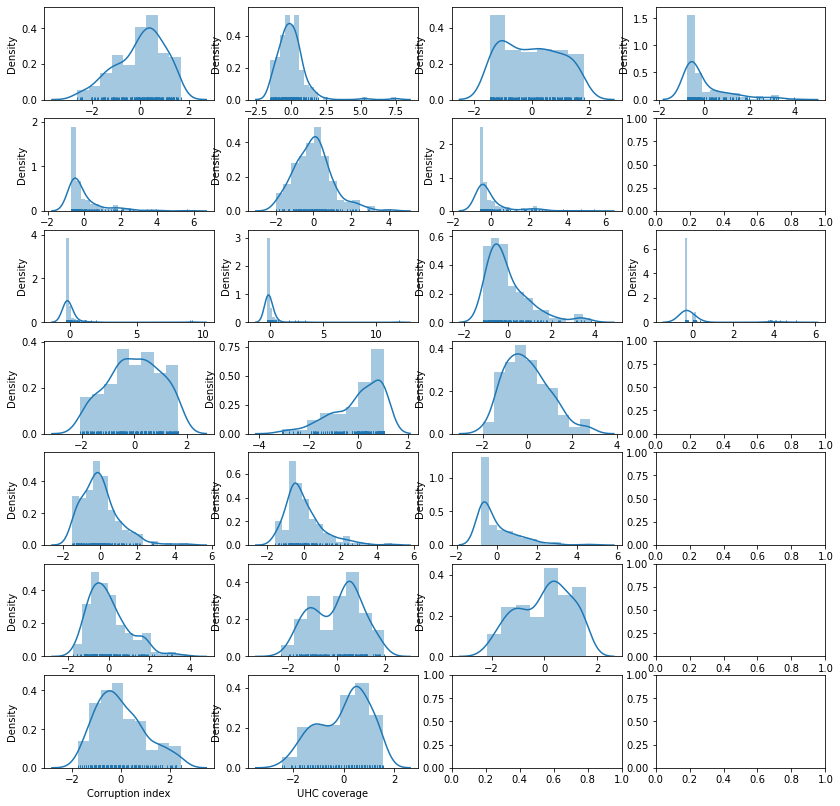

In [8]:
# Histograms

df = data_sc.copy()
%matplotlib inline
# Univariate Histograms
f, axes = plt.subplots(7,4, figsize=(14, 14))
sns.distplot(df["Life Expectancy"], rug=True, ax=axes[0, 0])
sns.distplot(df["Cigarette consumption"], rug=True, ax=axes[0, 1])
sns.distplot(df["Alcohol consumption"], rug=True, ax=axes[0, 2])
sns.distplot(df["Tuberculosis cases"], rug=True, ax=axes[0, 3])
sns.distplot(df["GDP_per_capita"], rug=True, ax=axes[1, 0])
sns.distplot(df["Income Gini"], rug=True, ax=axes[1, 1])
sns.distplot(df["Health Exp"], rug=True, ax=axes[1, 2])
sns.distplot(df["Population"], rug=True, ax=axes[2, 0])
sns.distplot(df["Population Density"], rug=True, ax=axes[2, 1])
sns.distplot(df["PM2.5 exposure"], rug=True, ax=axes[2, 2])
sns.distplot(df["Pollution Death Rate"], rug=True, ax=axes[2, 3])
sns.distplot(df["Sanitation and Drinking Water"], rug=True, ax=axes[3, 0])
sns.distplot(df["Unsafe Water for Drinking"], rug=True, ax=axes[3, 1])
sns.distplot(df["EPI score"], ax=axes[3, 2])
sns.distplot(df["Cardiovascular"], rug=True, ax=axes[4, 0])
sns.distplot(df["Diabetes"], rug=True, ax=axes[4, 1])
sns.distplot(df["Respiratory"], ax=axes[4, 2])
sns.distplot(df["Asthma"], rug=True, ax=axes[5, 0])
sns.distplot(df["Democracy Index"], rug=True, ax=axes[5, 1])
sns.distplot(df["Human Development Index"], ax=axes[5, 2])
sns.distplot(df["Corruption index"], rug=True, ax=axes[6, 0])
sns.distplot(df["UHC coverage"], rug=True, ax=axes[6, 1])

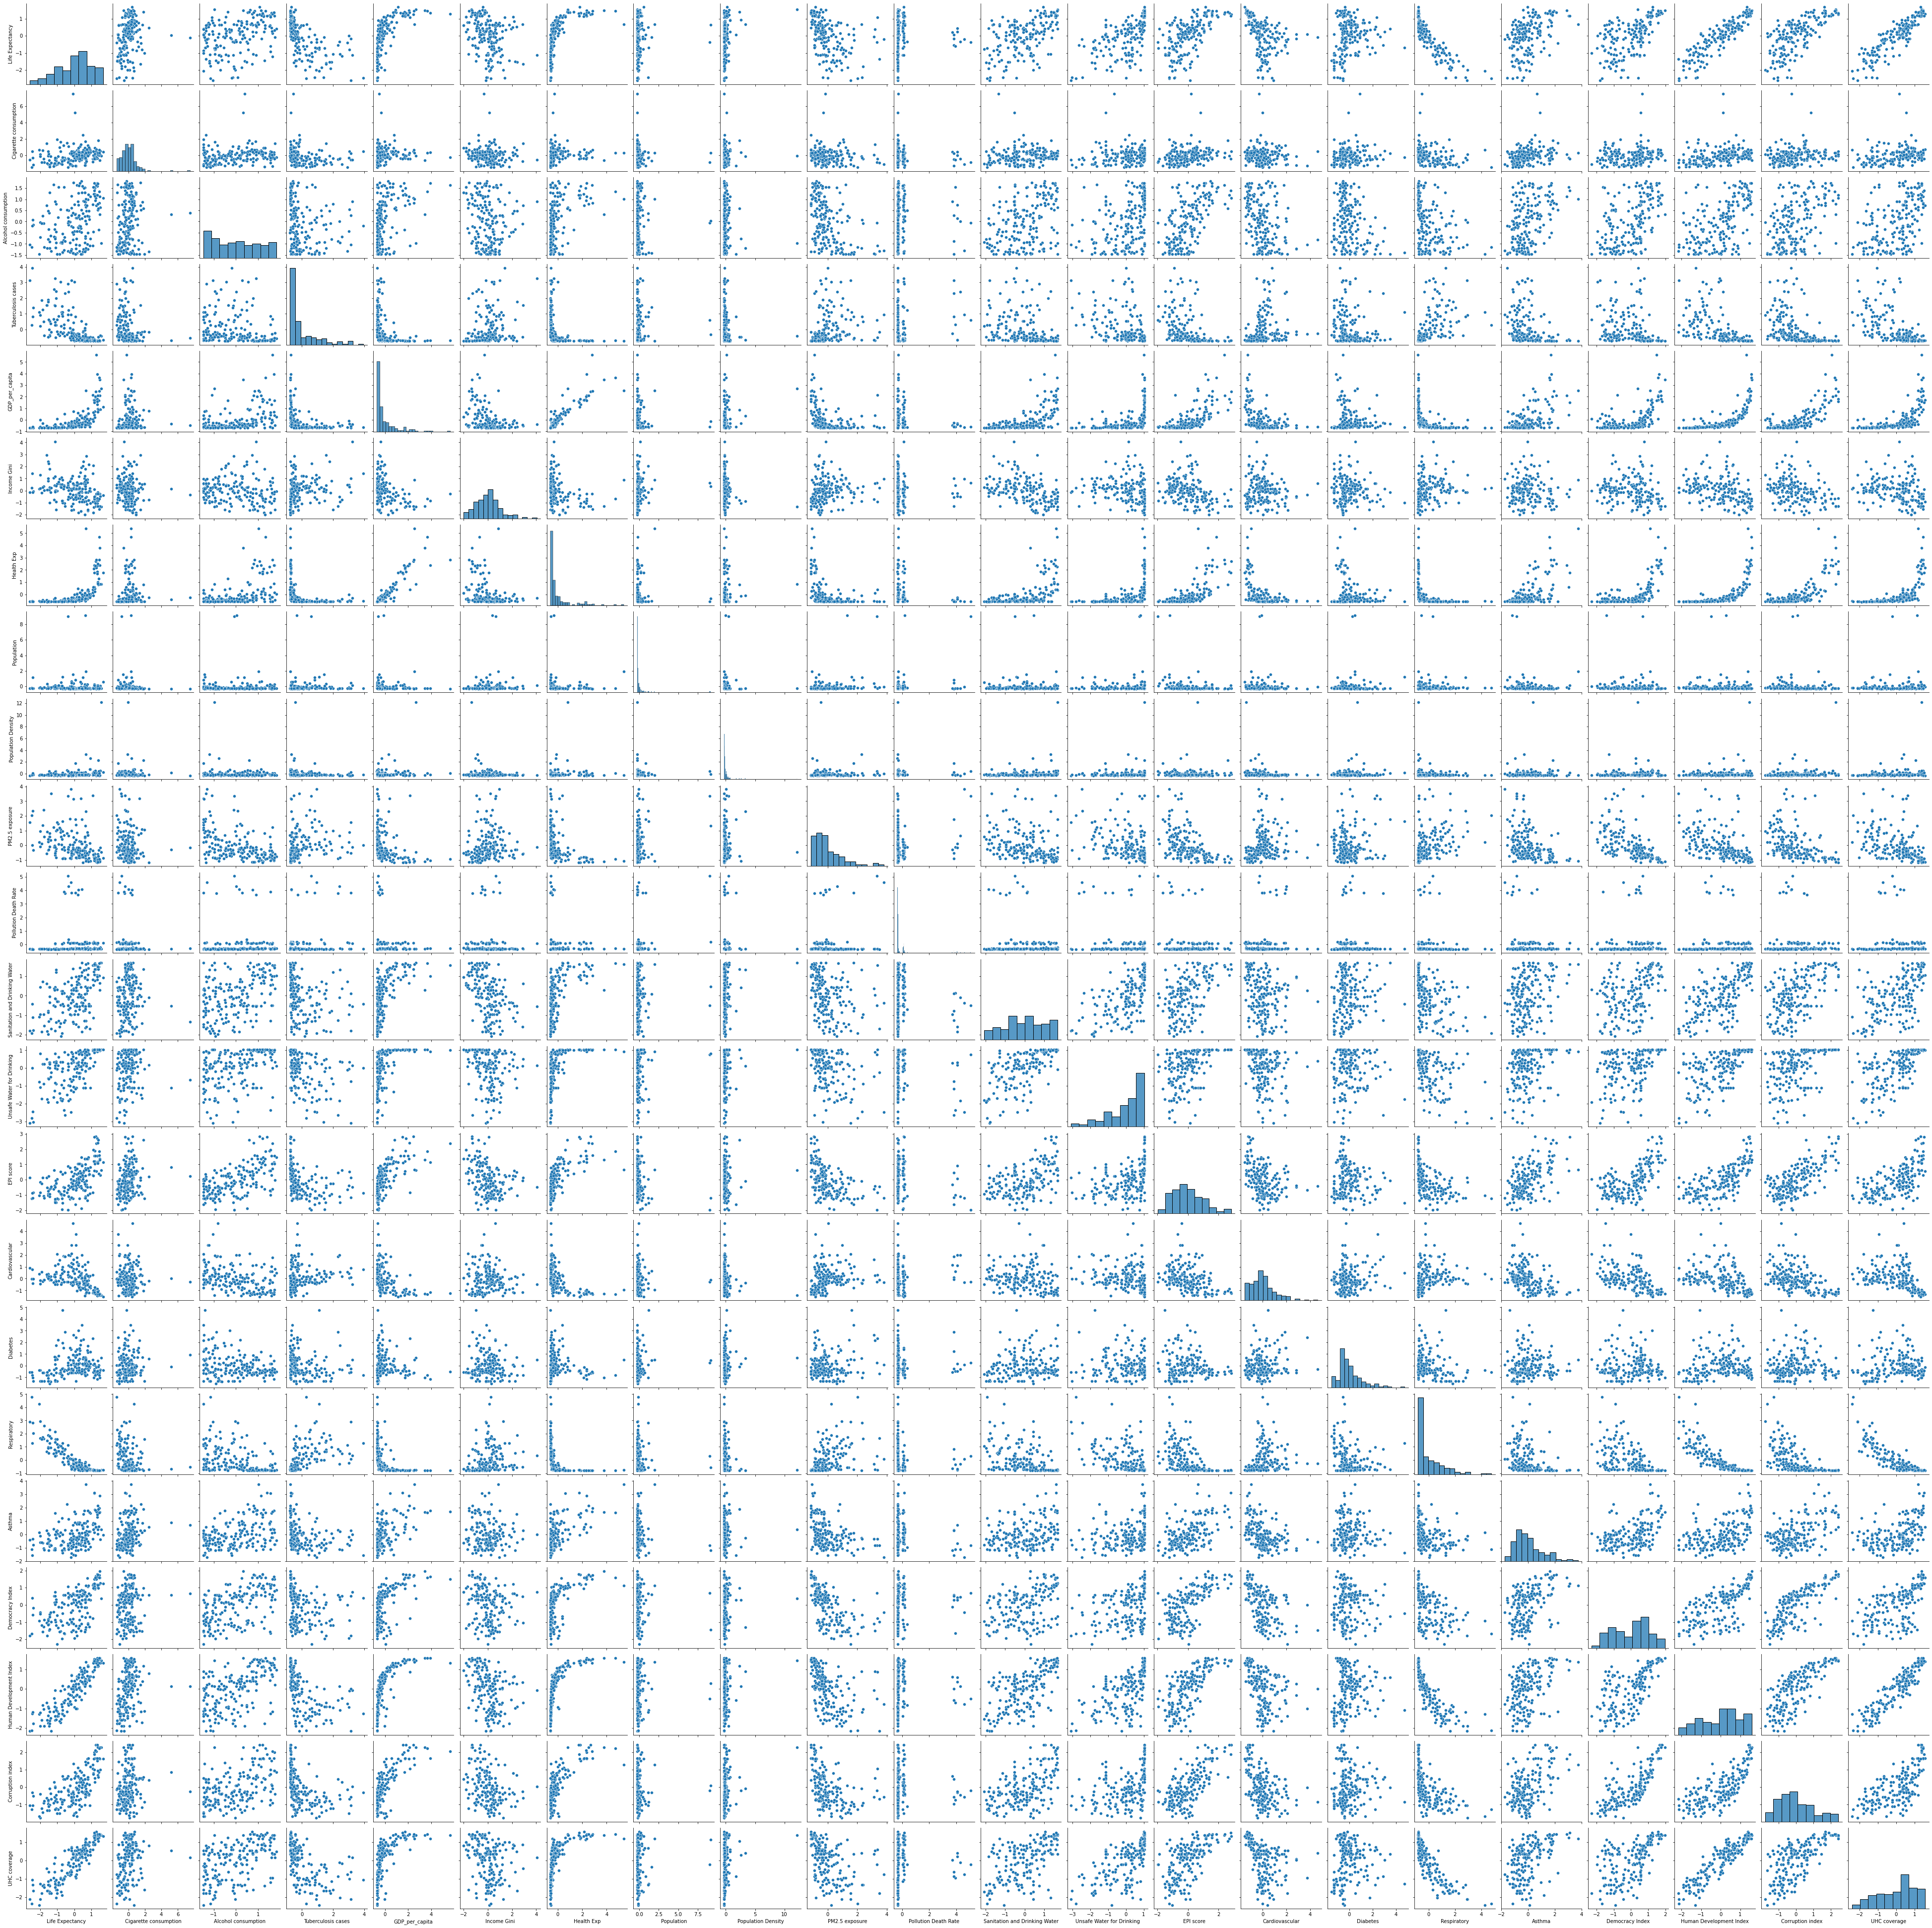

In [9]:
sns.pairplot(df)

<Figure size 2160x2160 with 0 Axes>

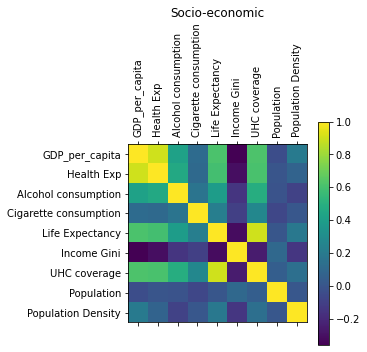

The contributions of principal components are: [41.  12.6 11.9 10.8  8.6  6.7  6.6  1.   0.9]
GDP_per_capita           0.452327
Health Exp               0.149621
Alcohol consumption      0.448796
Cigarette consumption   -0.234957
Life Expectancy          0.456473
Income Gini              0.102820
UHC coverage            -0.011004
Population               0.314661
Population Density       0.445329
Name: Weights, dtype: float64


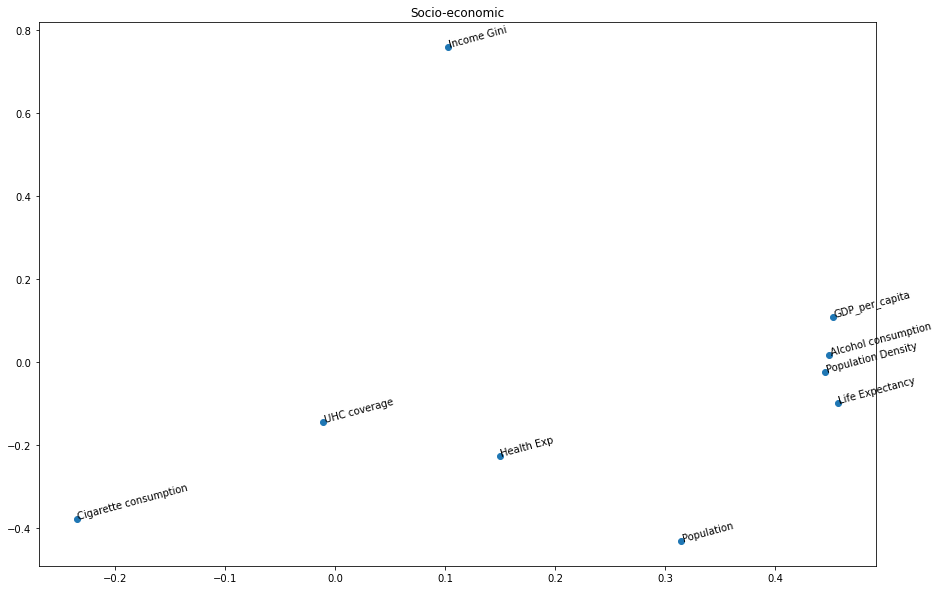

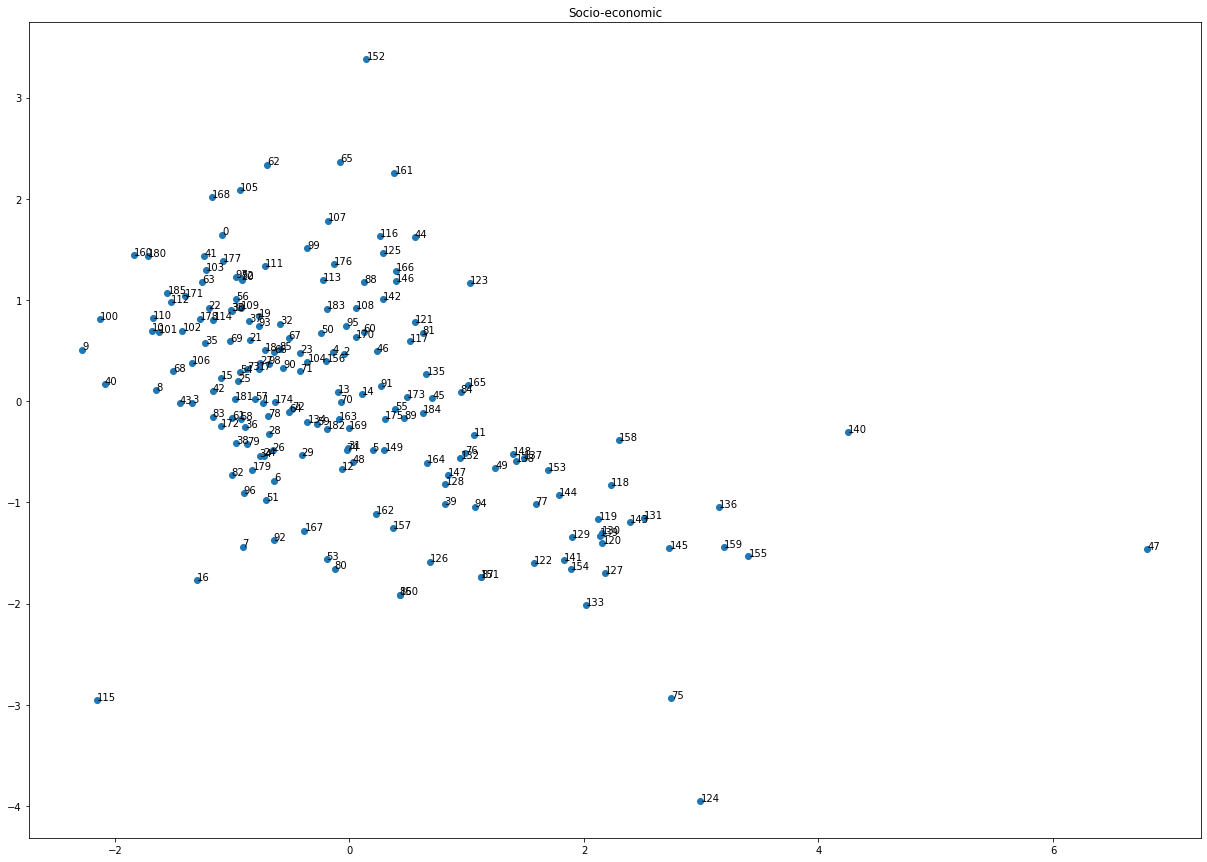

            0         1  Percentile
47   6.805851 -1.459769   99.999986
140  4.254696 -0.309095   99.934154
155  3.402830 -1.533232   99.490204
159  3.194230 -1.441989   99.205913
136  3.148496 -1.049722   99.127516
..        ...       ...         ...
160 -1.840398  1.439178    8.234222
40  -2.088716  0.167942    5.740167
100 -2.128039  0.809977    5.406503
115 -2.152241 -2.956302    5.208904
9   -2.279245  0.508671    4.264226

[186 rows x 3 columns]


<Figure size 2160x2160 with 0 Axes>

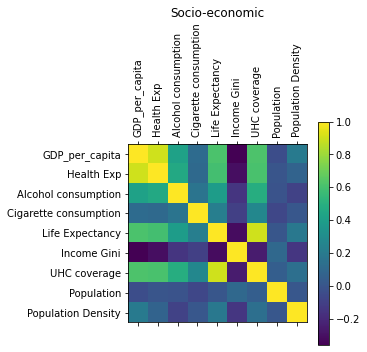

The contributions of principal components are: [41.  12.6 11.9 10.8  8.6  6.7  6.6  1.   0.9]
GDP_per_capita           0.452327
Health Exp               0.149621
Alcohol consumption      0.448796
Cigarette consumption   -0.234957
Life Expectancy          0.456473
Income Gini              0.102820
UHC coverage            -0.011004
Population               0.314661
Population Density       0.445329
Name: Weights, dtype: float64


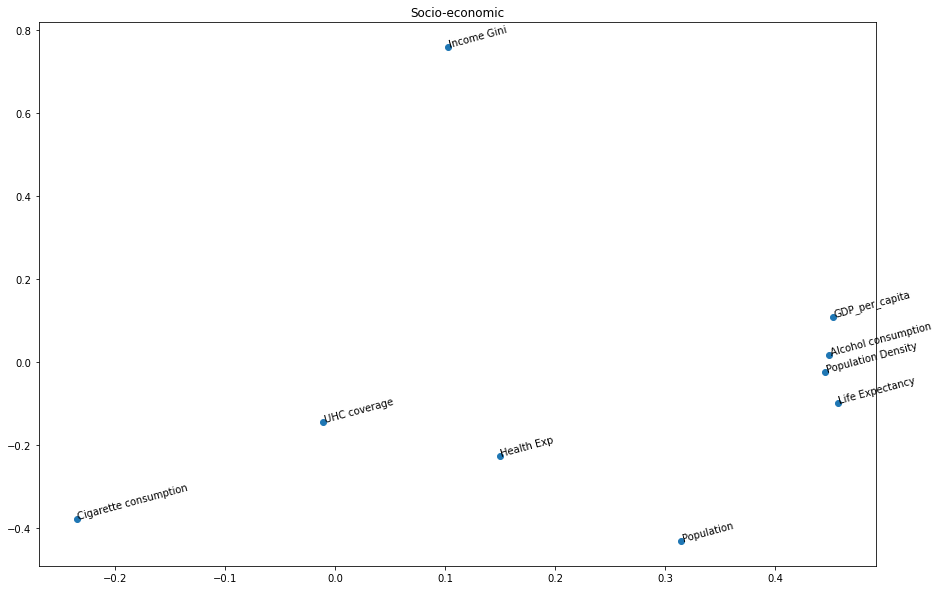

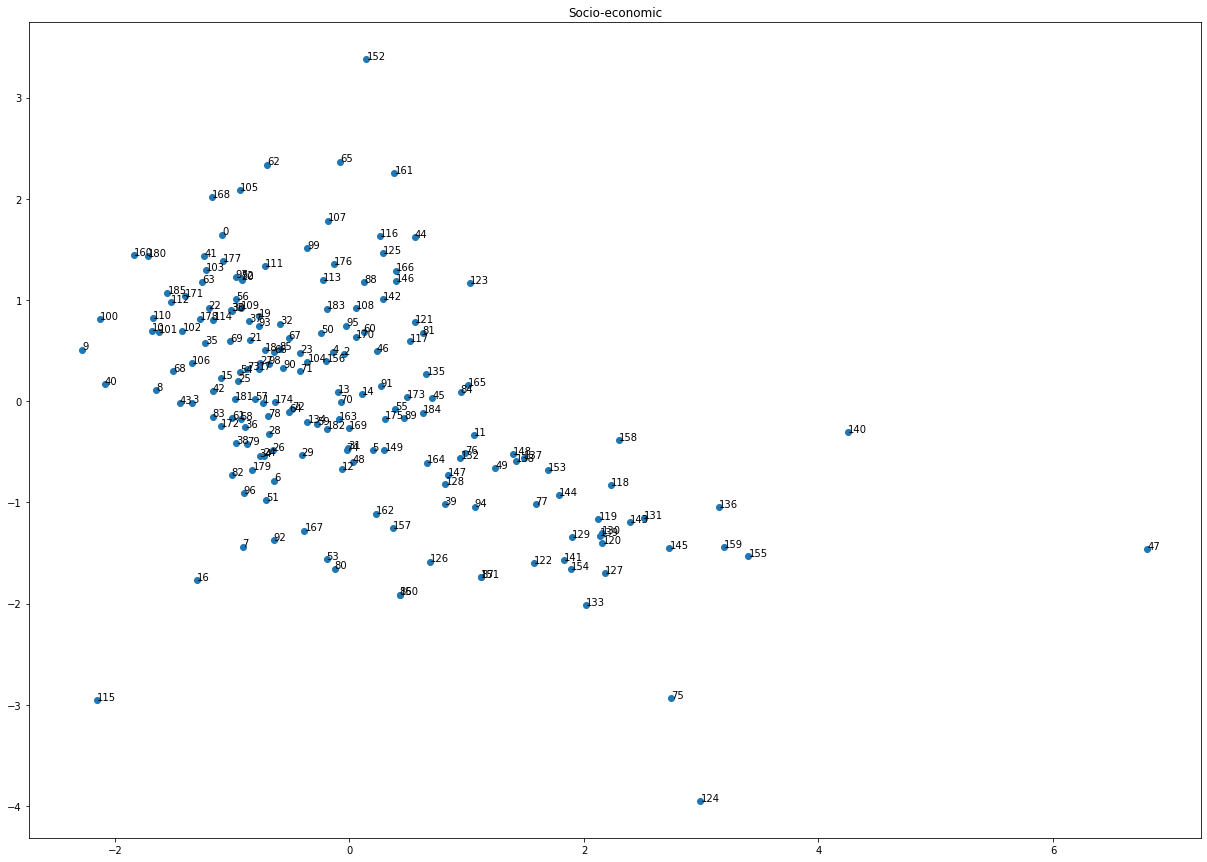

            0         1  Percentile
47   6.805851 -1.459769   99.999986
140  4.254696 -0.309095   99.934154
155  3.402830 -1.533232   99.490204
159  3.194230 -1.441989   99.205913
136  3.148496 -1.049722   99.127516
..        ...       ...         ...
160 -1.840398  1.439178    8.234222
40  -2.088716  0.167942    5.740167
100 -2.128039  0.809977    5.406503
115 -2.152241 -2.956302    5.208904
9   -2.279245  0.508671    4.264226

[186 rows x 3 columns]


<Figure size 2160x2160 with 0 Axes>

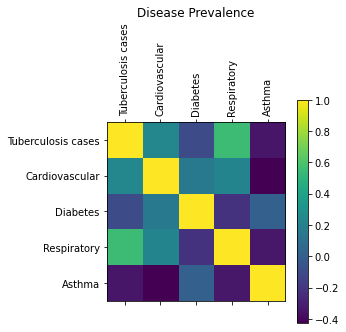

The contributions of principal components are: [41.4 24.2 14.8 10.8  8.7]
Tuberculosis cases    0.532991
Cardiovascular        0.410004
Diabetes             -0.105511
Respiratory          -0.500587
Asthma                0.534881
Name: Weights, dtype: float64


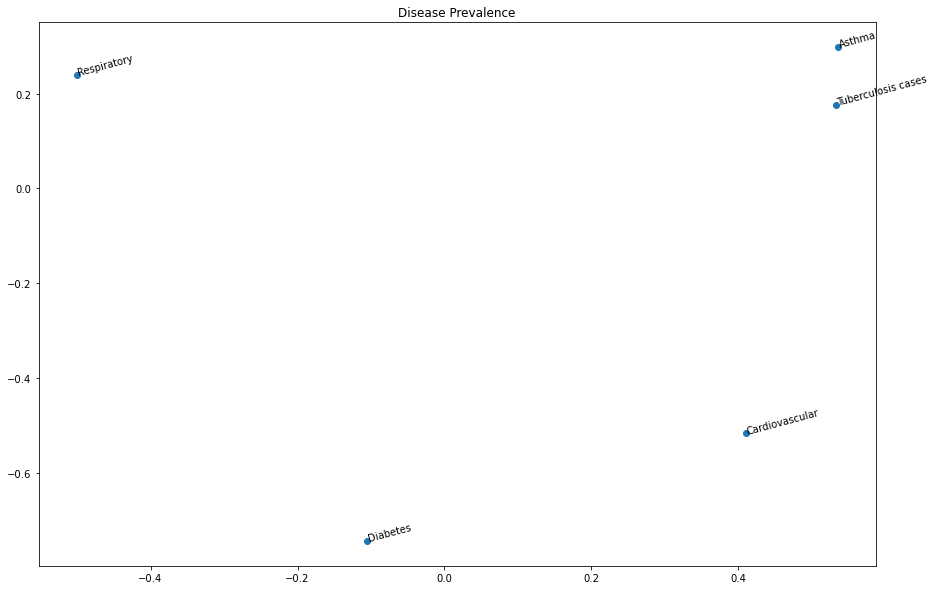

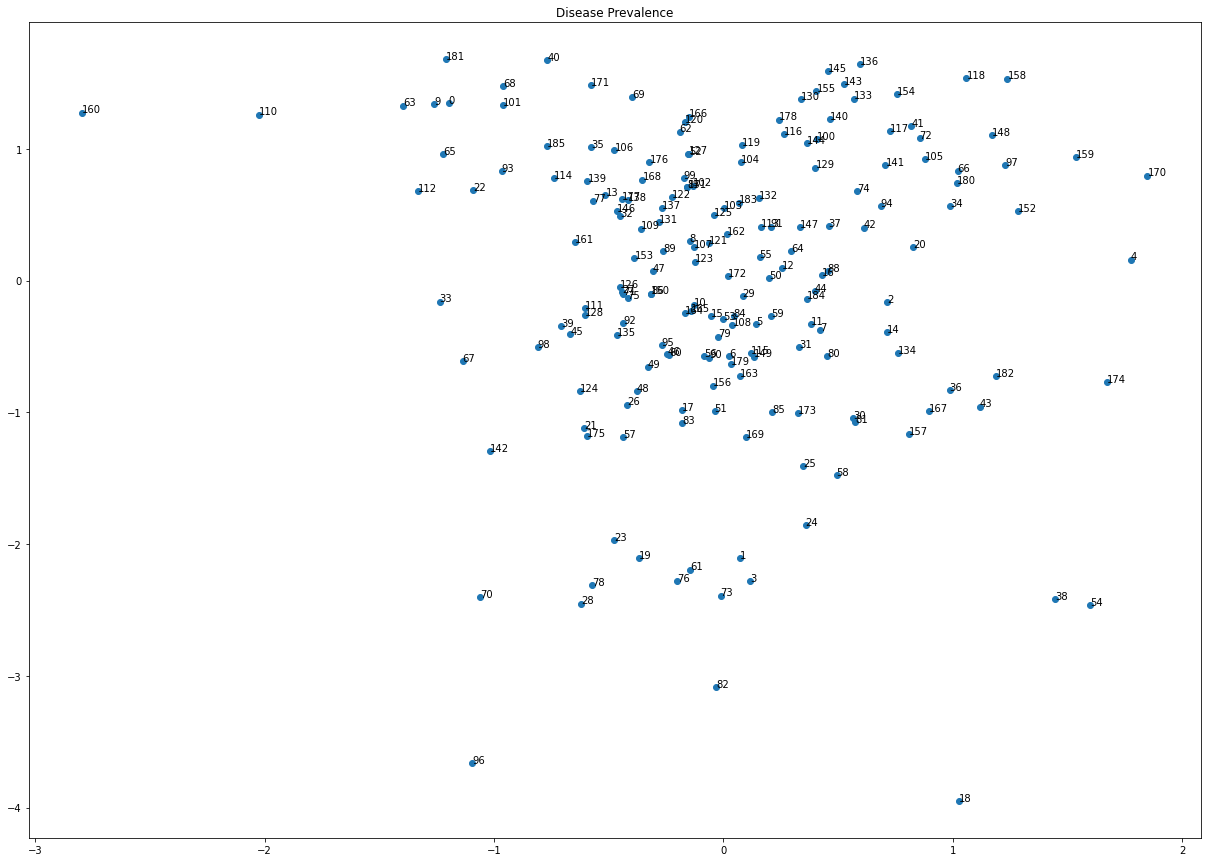

            0         1  Percentile
170  1.849377  0.798214   99.592054
4    1.776047  0.159326   99.446574
174  1.671341 -0.767386   99.159305
54   1.600877 -2.464499   98.898811
159  1.535511  0.937172   98.597033
..        ...       ...         ...
9   -1.261495  1.341333    3.557705
112 -1.332838  0.678102    2.828979
63  -1.397518  1.328552    2.280067
110 -2.023319  1.260644    0.190041
160 -2.795359  1.276823    0.003186

[186 rows x 3 columns]


<Figure size 2160x2160 with 0 Axes>

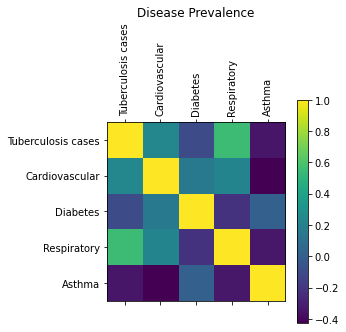

The contributions of principal components are: [41.4 24.2 14.8 10.8  8.7]
Tuberculosis cases    0.532991
Cardiovascular        0.410004
Diabetes             -0.105511
Respiratory          -0.500587
Asthma                0.534881
Name: Weights, dtype: float64


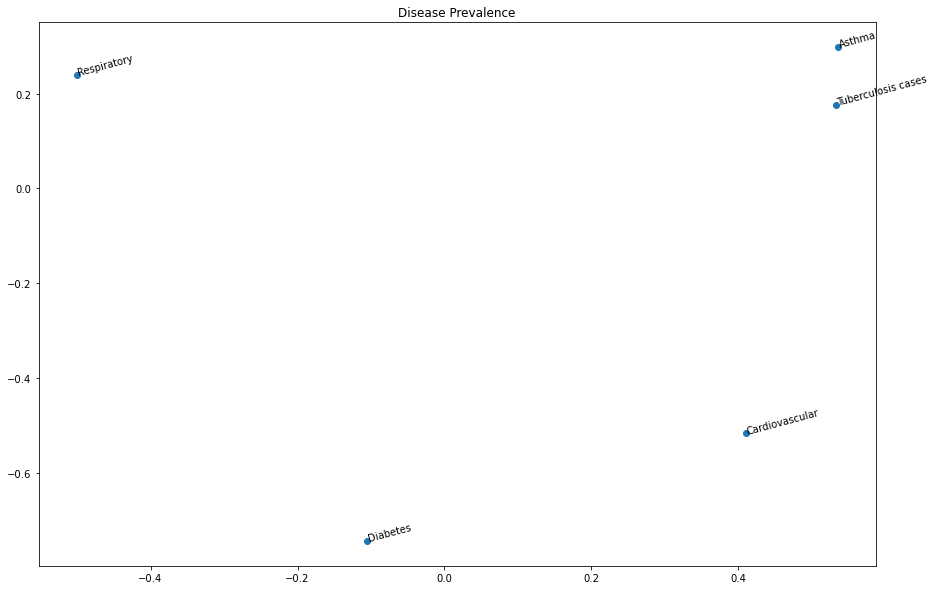

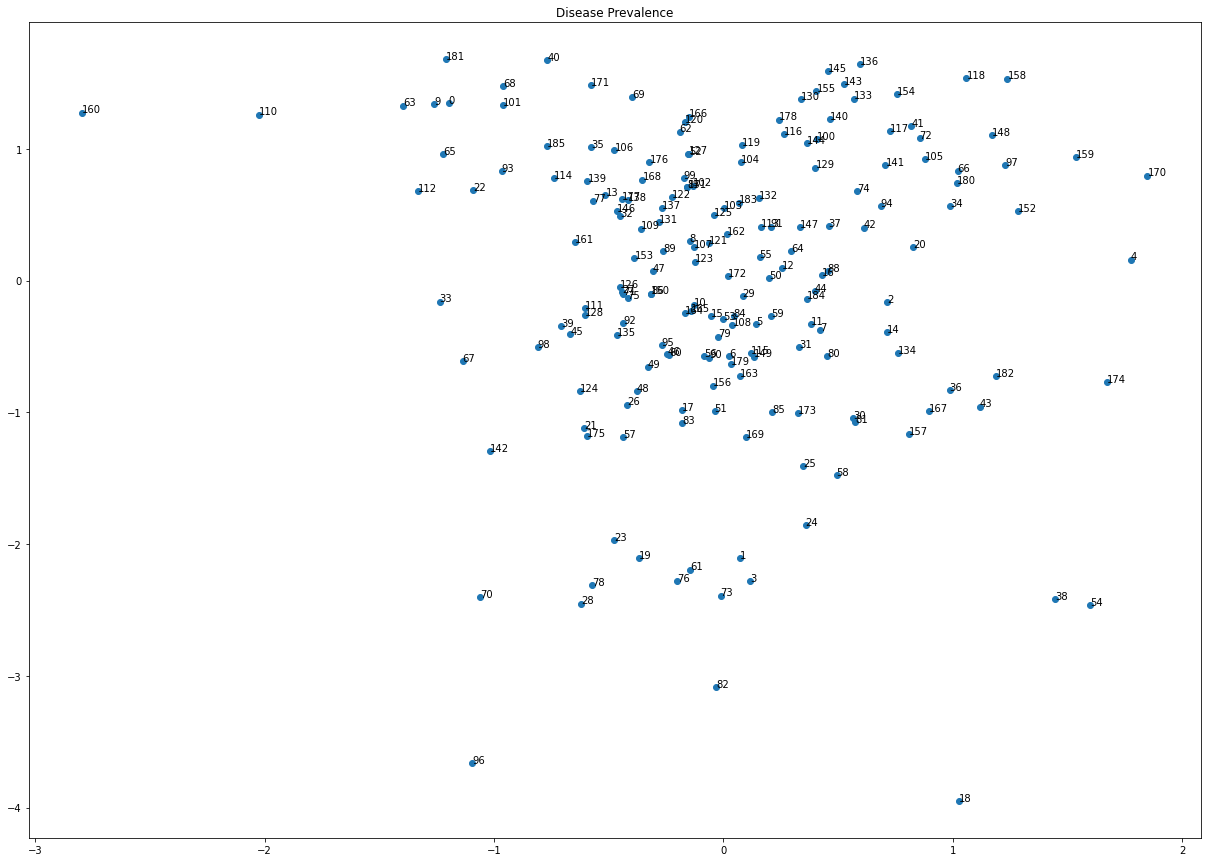

            0         1  Percentile
170  1.849377  0.798214   99.592054
4    1.776047  0.159326   99.446574
174  1.671341 -0.767386   99.159305
54   1.600877 -2.464499   98.898811
159  1.535511  0.937172   98.597033
..        ...       ...         ...
9   -1.261495  1.341333    3.557705
112 -1.332838  0.678102    2.828979
63  -1.397518  1.328552    2.280067
110 -2.023319  1.260644    0.190041
160 -2.795359  1.276823    0.003186

[186 rows x 3 columns]


<Figure size 2160x2160 with 0 Axes>

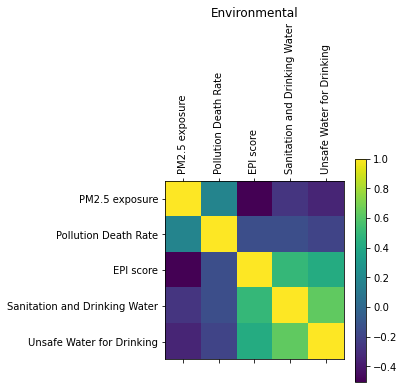

The contributions of principal components are: [48.5 18.7 16.5  9.9  6.5]
PM2.5 exposure                   0.426633
Pollution Death Rate            -0.510078
EPI score                       -0.505787
Sanitation and Drinking Water   -0.502142
Unsafe Water for Drinking        0.223240
Name: Weights, dtype: float64


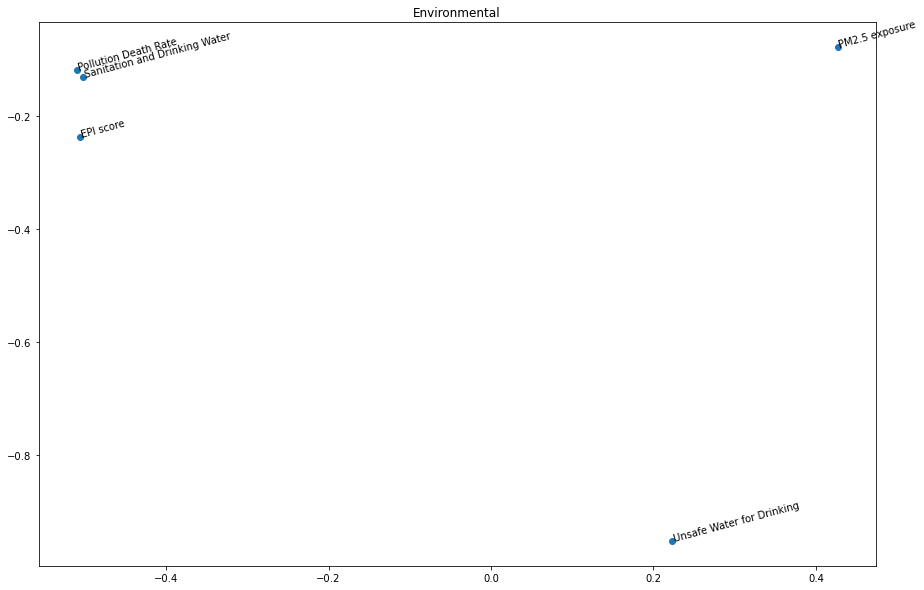

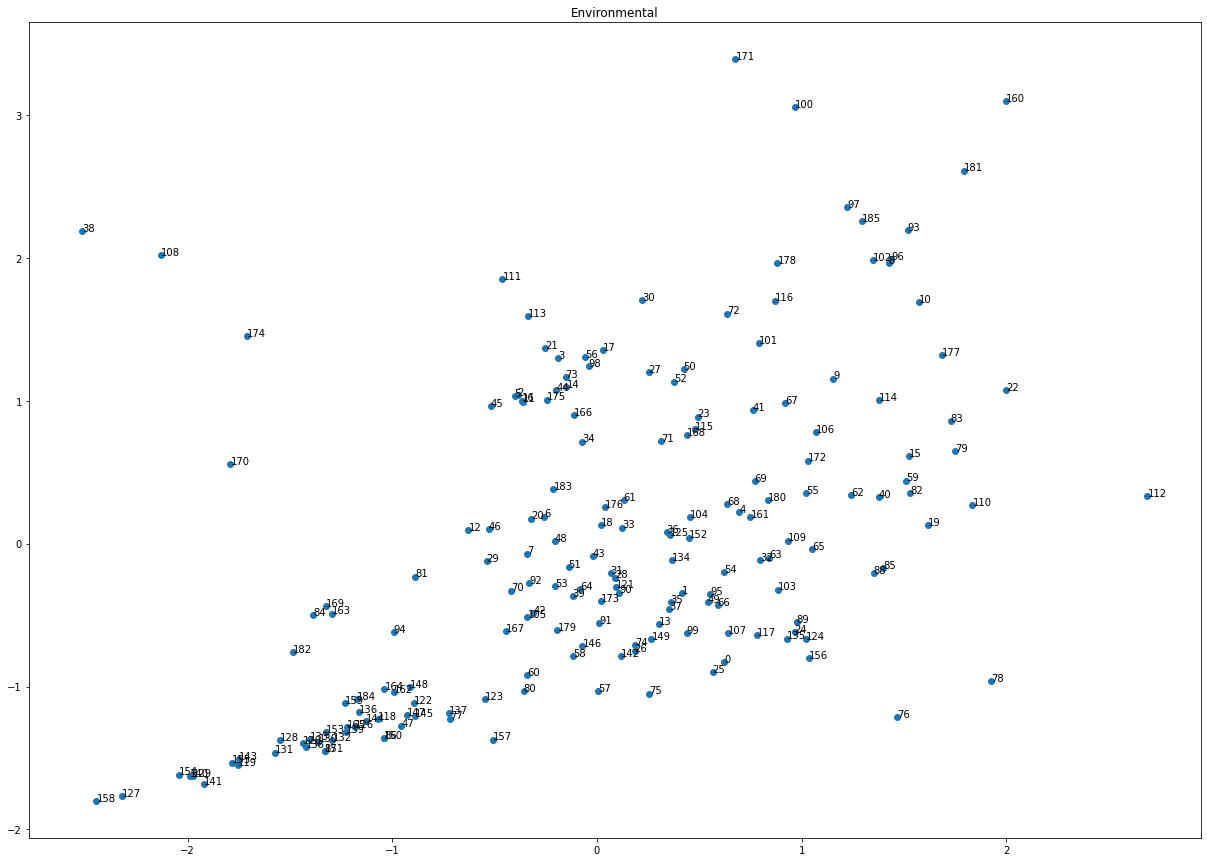

            0         1  Percentile
112  2.688683  0.334330   99.475923
22   1.998673  1.075944   97.145765
160  1.996918  3.100610   97.134840
78   1.926580 -0.962238   96.667535
110  1.833649  0.271985   95.955672
..        ...       ...         ...
154 -2.043777 -1.616299    2.585146
108 -2.131323  2.022515    2.123225
127 -2.322291 -1.765231    1.352714
158 -2.444995 -1.799516    0.996818
38  -2.514587  2.187037    0.833759

[186 rows x 3 columns]


<Figure size 2160x2160 with 0 Axes>

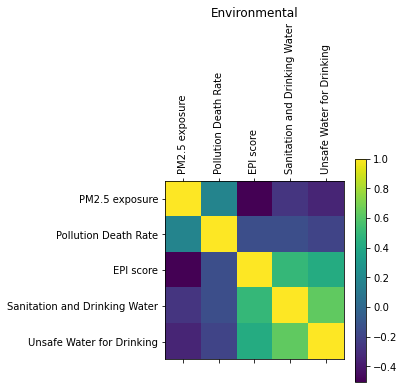

The contributions of principal components are: [48.5 18.7 16.5  9.9  6.5]
PM2.5 exposure                   0.426633
Pollution Death Rate            -0.510078
EPI score                       -0.505787
Sanitation and Drinking Water   -0.502142
Unsafe Water for Drinking        0.223240
Name: Weights, dtype: float64


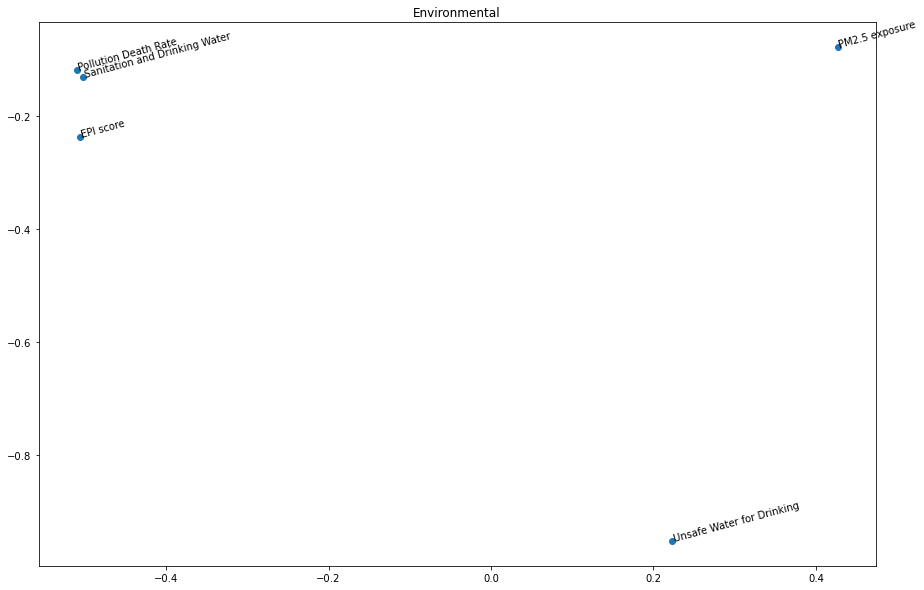

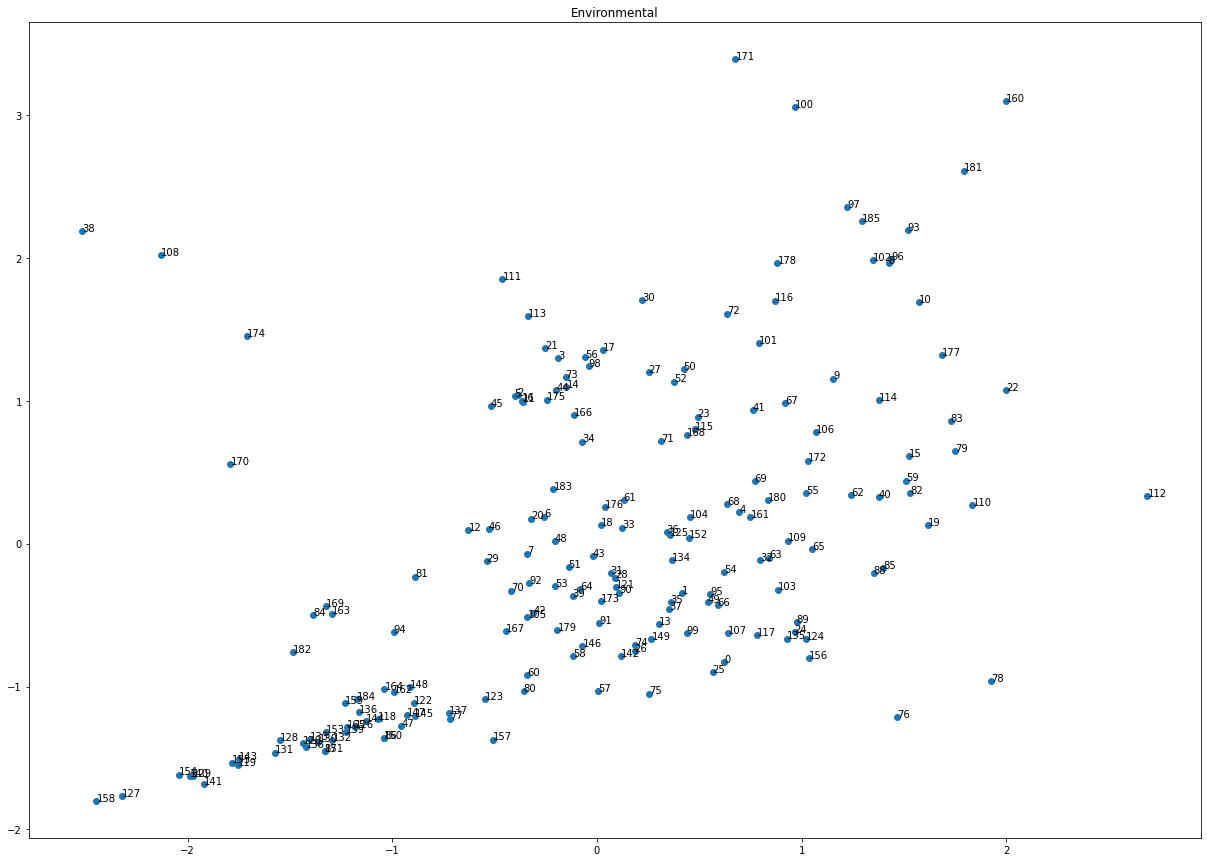

            0         1  Percentile
112  2.688683  0.334330   99.475923
22   1.998673  1.075944   97.145765
160  1.996918  3.100610   97.134840
78   1.926580 -0.962238   96.667535
110  1.833649  0.271985   95.955672
..        ...       ...         ...
154 -2.043777 -1.616299    2.585146
108 -2.131323  2.022515    2.123225
127 -2.322291 -1.765231    1.352714
158 -2.444995 -1.799516    0.996818
38  -2.514587  2.187037    0.833759

[186 rows x 3 columns]


<Figure size 2160x2160 with 0 Axes>

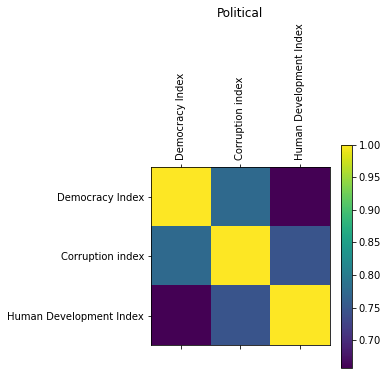

The contributions of principal components are: [81.8 11.5  6.7]
Democracy Index           -0.572275
Corruption index          -0.594929
Human Development Index   -0.564412
Name: Weights, dtype: float64


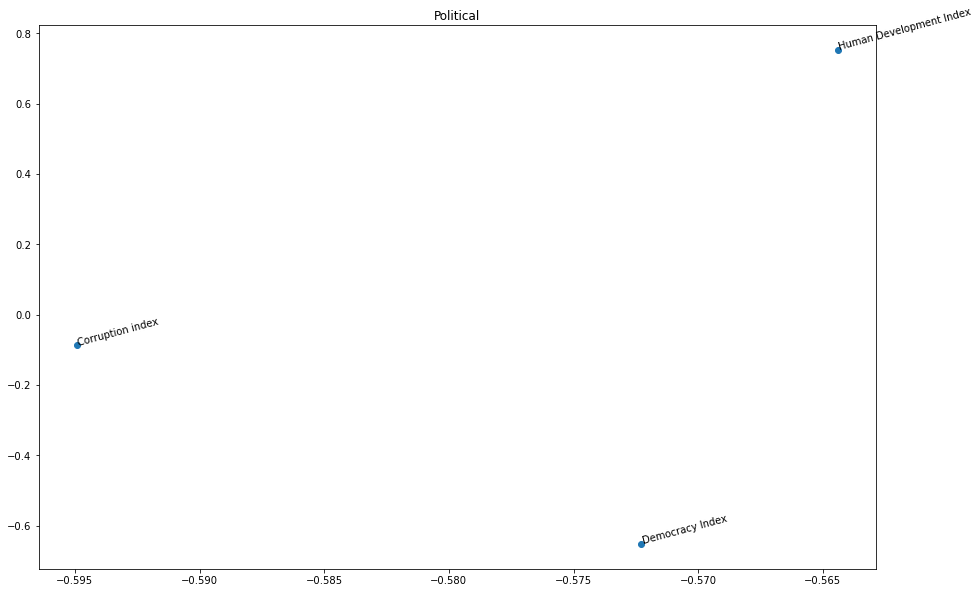

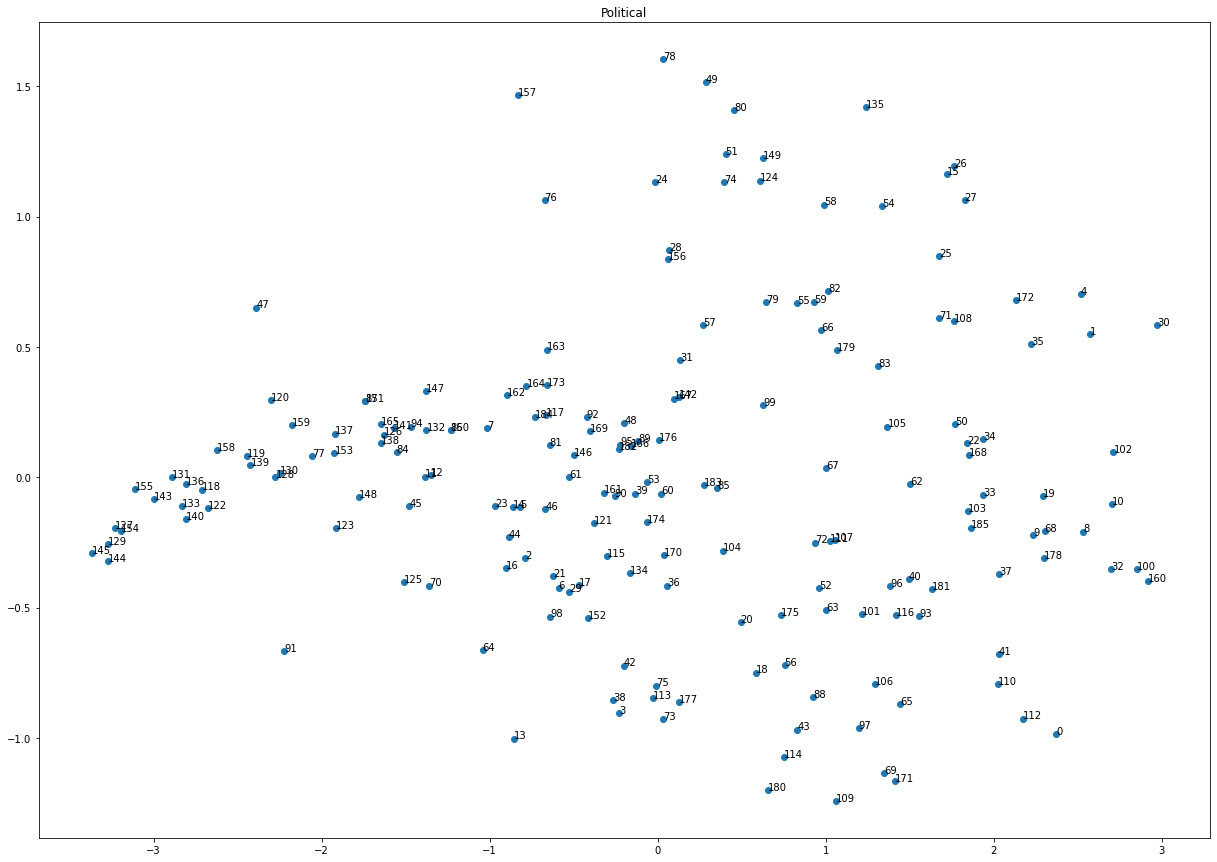

            0         1  Percentile
30   2.973127  0.582255   97.112743
160  2.918130 -0.397807   96.873543
100  2.853920 -0.351185   96.573778
102  2.713272  0.095764   95.834299
10   2.706253 -0.101653   95.794246
..        ...       ...         ...
154 -3.196720 -0.205391    2.065834
127 -3.231547 -0.194586    1.957690
144 -3.270065 -0.321840    1.843724
129 -3.270479 -0.257488    1.842529
145 -3.368001 -0.289516    1.579107

[186 rows x 3 columns]


<Figure size 2160x2160 with 0 Axes>

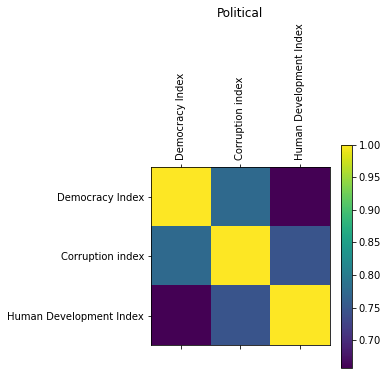

The contributions of principal components are: [81.8 11.5  6.7]
Democracy Index           -0.572275
Corruption index          -0.594929
Human Development Index   -0.564412
Name: Weights, dtype: float64


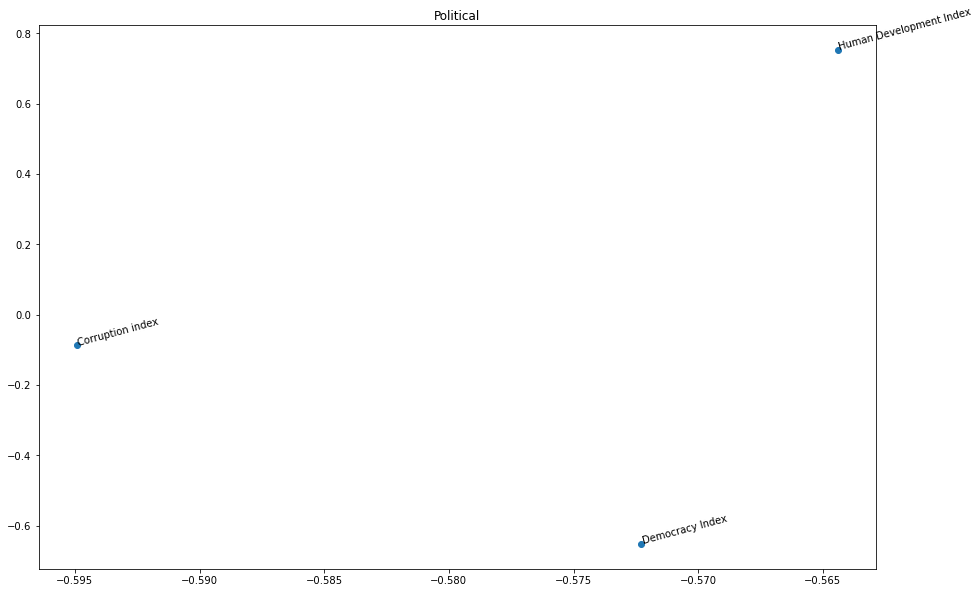

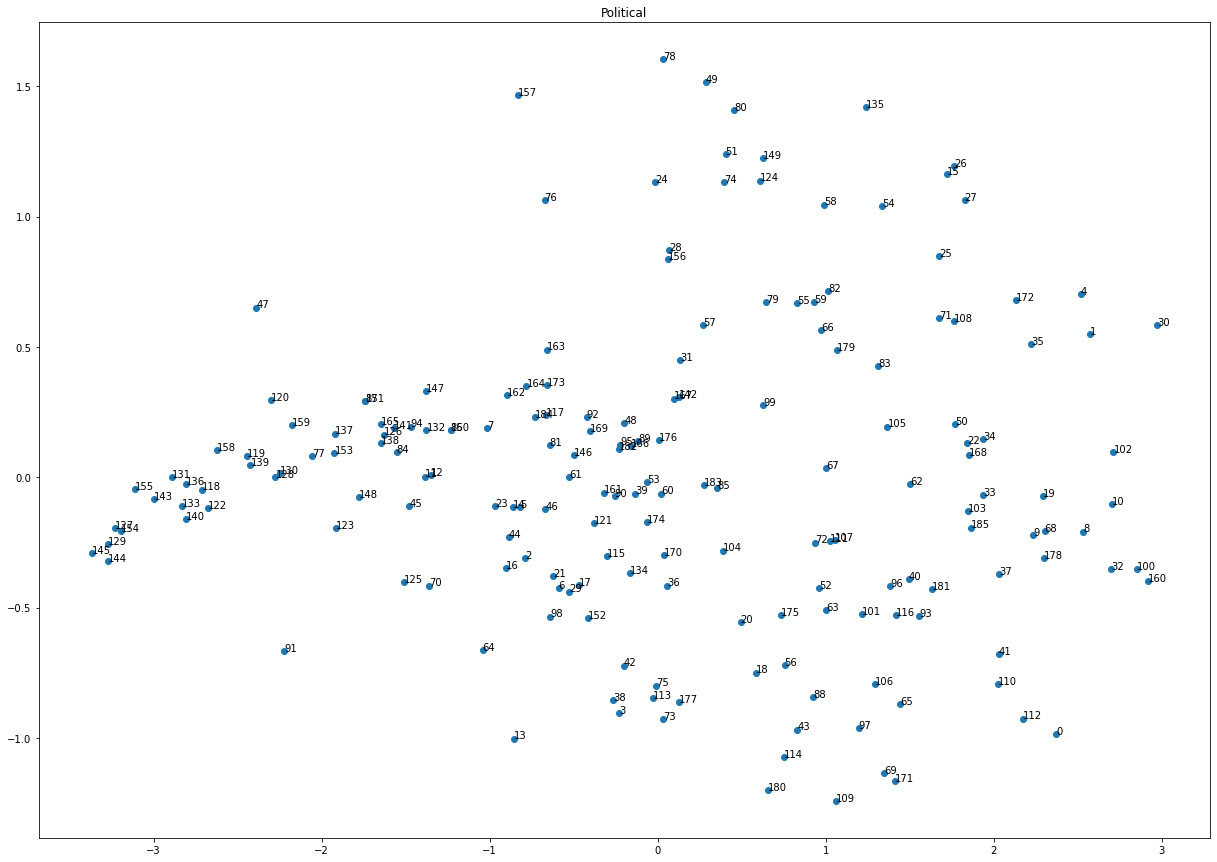

            0         1  Percentile
30   2.973127  0.582255   97.112743
160  2.918130 -0.397807   96.873543
100  2.853920 -0.351185   96.573778
102  2.713272  0.095764   95.834299
10   2.706253 -0.101653   95.794246
..        ...       ...         ...
154 -3.196720 -0.205391    2.065834
127 -3.231547 -0.194586    1.957690
144 -3.270065 -0.321840    1.843724
129 -3.270479 -0.257488    1.842529
145 -3.368001 -0.289516    1.579107

[186 rows x 3 columns]


In [18]:
from scipy.stats import norm

def pca(df, title, switch=0):
    C = df.corr()
    n = len(C)
    plt.figure(figsize=(30, 30))
    plt.matshow(C)
    plt.colorbar()
    plt.xticks(np.arange(n), df.columns, rotation=90)
    plt.yticks(np.arange(n), df.columns, rotation=0)
    plt.title(title)
    plt.show()

    l, U = np.linalg.eig(C)
    indices = np.argsort(l)[::-1]
    l = l[indices]
    U = np.real(U)[:,indices][indices,:]*(-1)**switch
    pca_weights = np.round(np.real(l) / n * 100, 1)
    print(f'The contributions of principal components are: {pca_weights}')

    C['Weights'] = U[:, 0]
    print(C['Weights'])

    plt.figure(figsize=(15, 10))
    plt.scatter(U[:,0], U[:,1])
    for i in range(n):
        plt.annotate(df.columns[i], (U[i,0], U[i, 1]), rotation=15)

    plt.title(title)
    plt.show()

    df_norm = (df - df.mean())/df.std()
    coords = df_norm @ np.real(U[:,:2])
    
    x = coords.iloc[:,0]
    y = coords.iloc[:,1]

    plt.figure(figsize=(21, 15))

    plt.scatter(x, y)
    for i in range(len(x)):
        plt.annotate(df.index[i], (x[i], y[i]), rotation=0)

    plt.title(title)
    plt.show()

    coords['Percentile'] = norm.cdf((coords[0] - coords[0].mean())/coords[0].std()) * 100
    print(coords.sort_values(0, ascending=False))
    return coords.loc[:,[0, 'Percentile']]

cf = {}
pf = {}
for category, factors in categories.items():
    cf[category] = pca(df[factors], category, switch=(category!='Political')).loc[:,0]
    pf[category] = pca(df[factors], category, switch=(category!='Political')).loc[:,'Percentile']

cf = pd.DataFrame(cf)
pf = pd.DataFrame(pf)

<Figure size 2160x2160 with 0 Axes>

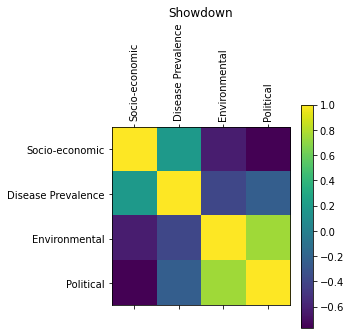

The contributions of principal components are: [64.3 22.5  8.3  4.8]
Socio-economic       -0.533507
Disease Prevalence   -0.288835
Environmental         0.555399
Political             0.568750
Name: Weights, dtype: float64


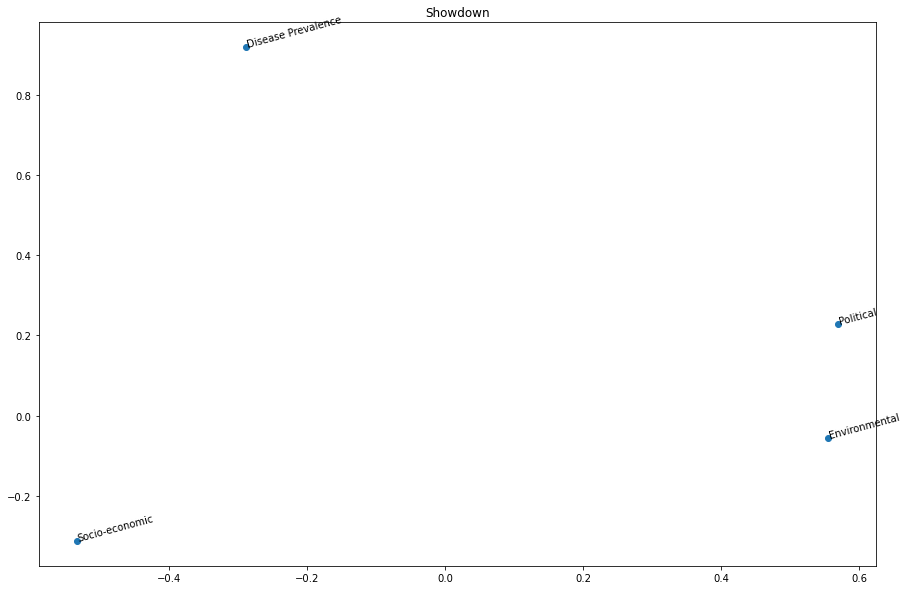

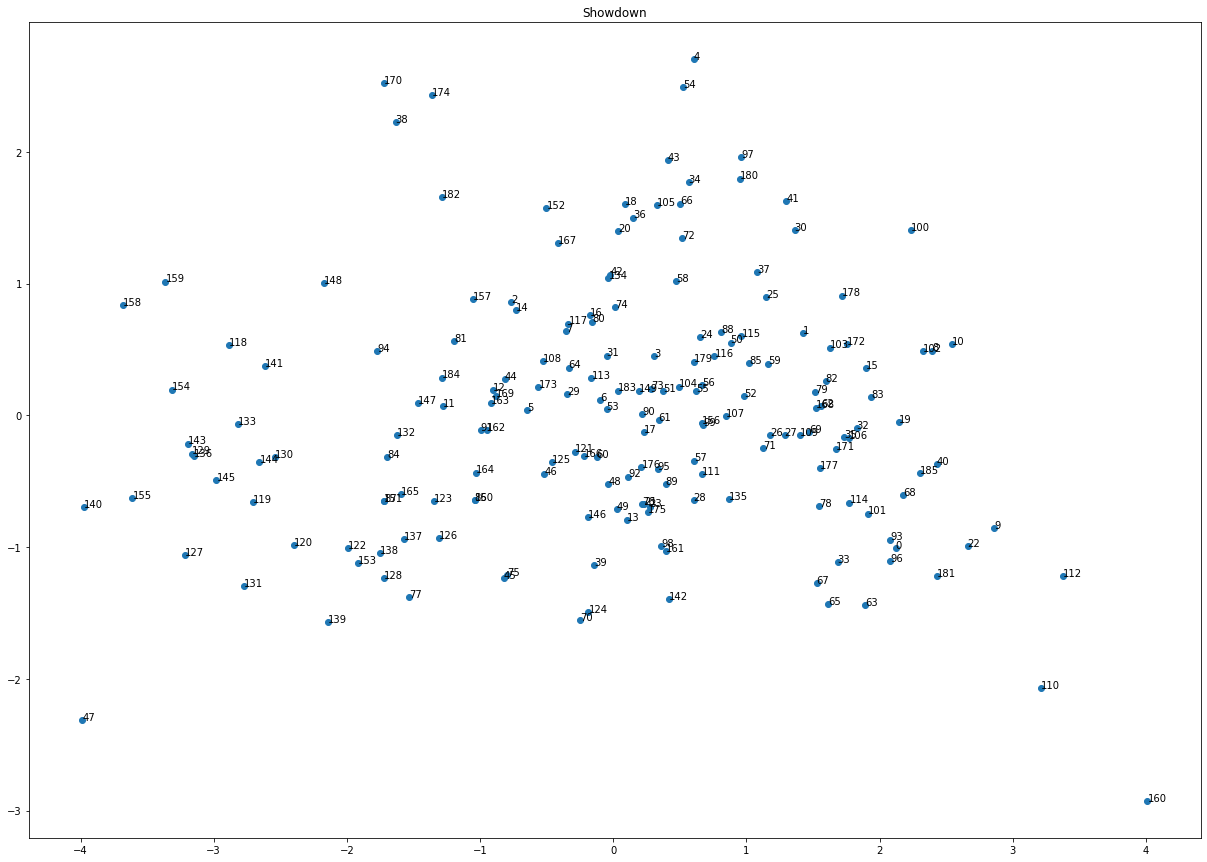

            0         1  Percentile
160  4.011356 -2.925708   99.379769
112  3.375952 -1.220333   98.232605
110  3.214385 -2.070312   97.744567
9    2.860202 -0.857187   96.269585
22   2.661296 -0.990608   95.142998
..        ...       ...         ...
159 -3.362277  1.013983    1.804882
155 -3.610639 -0.628237    1.220420
158 -3.680630  0.836134    1.088758
140 -3.976254 -0.698379    0.659607
47  -3.987544 -2.312210    0.646708

[186 rows x 3 columns]


In [11]:
ranking_cat = pca(cf, 'Showdown', switch=1)

In [21]:
combo = pf.copy()
combo['Categorical'] = ranking_cat['Percentile']
combo

Socio-economic  Disease Prevalence  Environmental  Political  Categorical
0         20.584026            4.331784      72.246402  93.499357    90.701179
1         28.901737           54.100418      65.395158  94.983846    81.222595
2         48.490437           84.654123      35.607615  30.706577    31.638041
3         15.561181           56.561724      42.784204  44.180001    57.618652
4         45.755223           99.446574      74.601258  94.615229    64.711054
..              ...                 ...            ...        ...          ...
181       23.075282            4.189347      95.598707  85.110060    93.522719
182       44.221036           95.550321       7.847740  44.153014    21.185152
183       44.300886           53.953904      41.962558  57.034773    50.894034
184       68.223527           69.856902      13.171499  32.051624    21.077049
185       12.066381           13.617733      89.081573  88.294017    92.438679

[186 rows x 5 columns]

In [22]:
pf

Socio-economic  Disease Prevalence  Environmental  Political  Categorical
0         20.584026            4.331784      72.246402  93.499357    90.701179
1         28.901737           54.100418      65.395158  94.983846    81.222595
2         48.490437           84.654123      35.607615  30.706577    31.638041
3         15.561181           56.561724      42.784204  44.180001    57.618652
4         45.755223           99.446574      74.601258  94.615229    64.711054
..              ...                 ...            ...        ...          ...
181       23.075282            4.189347      95.598707  85.110060    93.522719
182       44.221036           95.550321       7.847740  44.153014    21.185152
183       44.300886           53.953904      41.962558  57.034773    50.894034
184       68.223527           69.856902      13.171499  32.051624    21.077049
185       12.066381           13.617733      89.081573  88.294017    92.438679

[186 rows x 5 columns]

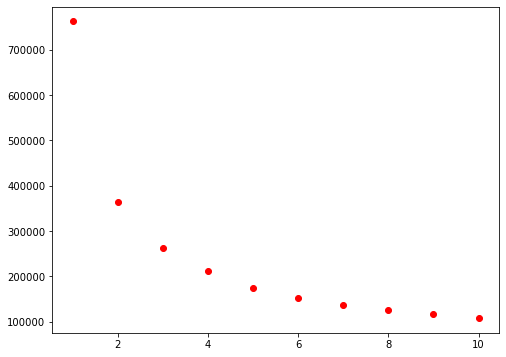

In [24]:
# K-Means Clustering:
cl = 10
corte = 0.1

anterior = 100000000000000
cost = [] 
K_best = cl

for k in range (1, cl+1):
    # Create a kmeans model on our data, using k clusters.  random_state helps ensure that the algorithm returns the same results each time.
    model = KMeans(
        n_clusters=k, 
        init='k-means++', #'random',
        n_init=10,
        max_iter=300,
        tol=1e-04,
        random_state=101)

    model = model.fit(combo)

    # These are our fitted labels for clusters -- the first cluster has label 0, and the second has label 1.
    labels = model.labels_
 
    # Sum of distances of samples to their closest cluster center
    interia = model.inertia_
    if (K_best == cl) and (((anterior - interia)/anterior) < corte): K_best = k - 1
    cost.append(interia)
    anterior = interia

plt.figure(figsize=(8, 6))
plt.scatter(range (1, cl+1), cost, c='red')
plt.show()

In [26]:
kmean= KMeans(K_best)
kmean.fit(combo)
labels=kmean.labels_

In [27]:
clusters=pd.concat([combo, pd.DataFrame({'cluster':labels})], axis=1)
clusters.head()

Socio-economic  Disease Prevalence  Environmental  Political  Categorical  \
0       20.584026            4.331784      72.246402  93.499357    90.701179   
1       28.901737           54.100418      65.395158  94.983846    81.222595   
2       48.490437           84.654123      35.607615  30.706577    31.638041   
3       15.561181           56.561724      42.784204  44.180001    57.618652   
4       45.755223           99.446574      74.601258  94.615229    64.711054   

   cluster  
0        0  
1        4  
2        3  
3        2  
4        4

In [28]:
combo['iso'] = countries['Country code']

In [31]:
combo

Socio-economic  Disease Prevalence  Environmental  Political  \
0         20.584026            4.331784      72.246402  93.499357   
1         28.901737           54.100418      65.395158  94.983846   
2         48.490437           84.654123      35.607615  30.706577   
3         15.561181           56.561724      42.784204  44.180001   
4         45.755223           99.446574      74.601258  94.615229   
..              ...                 ...            ...        ...   
181       23.075282            4.189347      95.598707  85.110060   
182       44.221036           95.550321       7.847740  44.153014   
183       44.300886           53.953904      41.962558  57.034773   
184       68.223527           69.856902      13.171499  32.051624   
185       12.066381           13.617733      89.081573  88.294017   

     Categorical  iso  
0      90.701179  SSD  
1      81.222595  SYR  
2      31.638041  DMA  
3      57.618652  FSM  
4      64.711054  PRK  
..           ...  ...  
181    93.522719  NGA  
182    21.185152  MKD  
183    50.894034  PRY  
184    21.077049  ROU  
185    92.438679  TGO  

[186 rows x 6 columns]

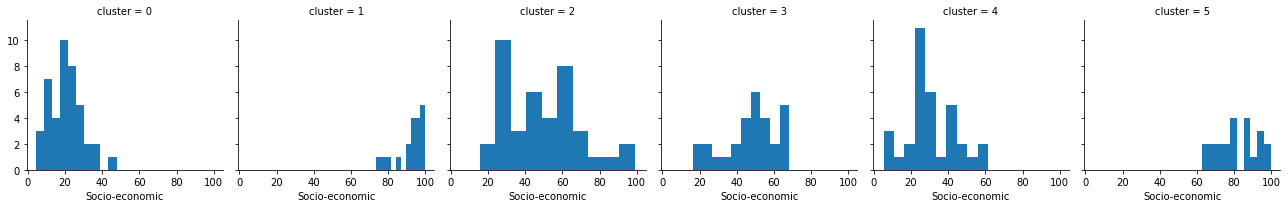

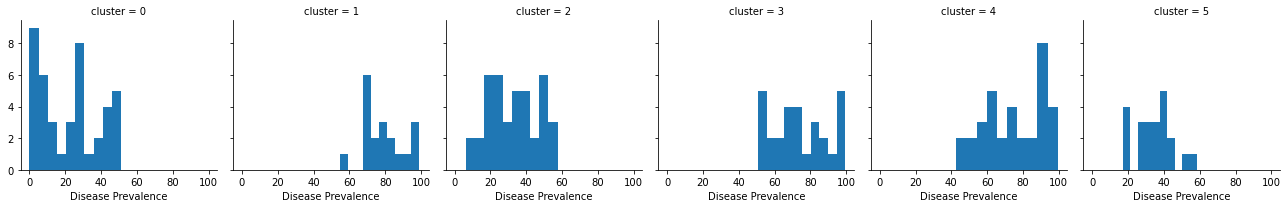

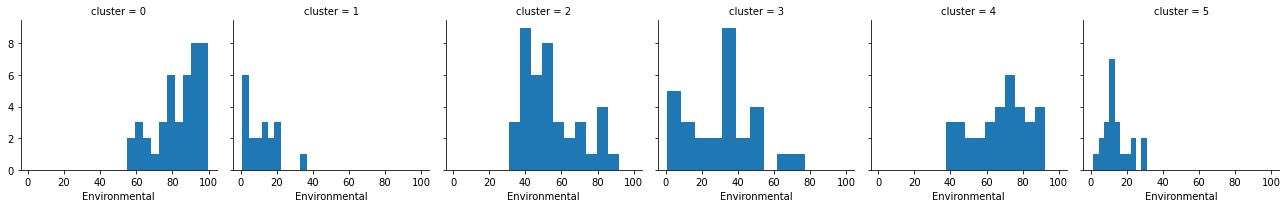

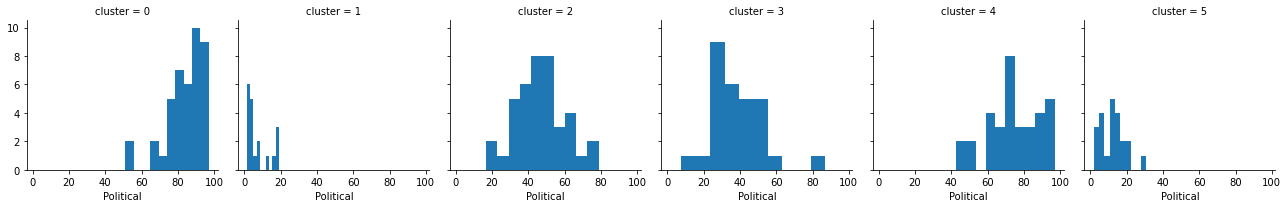

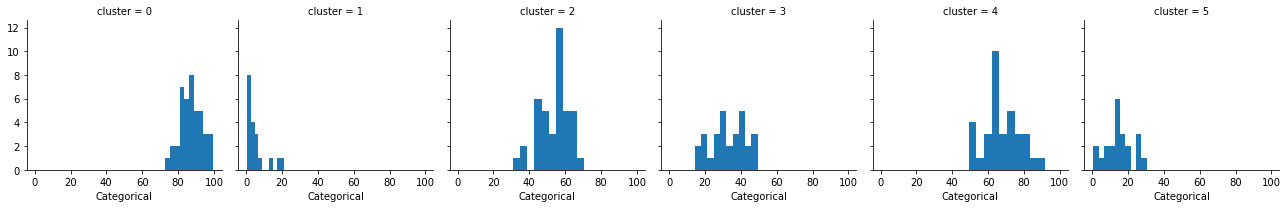

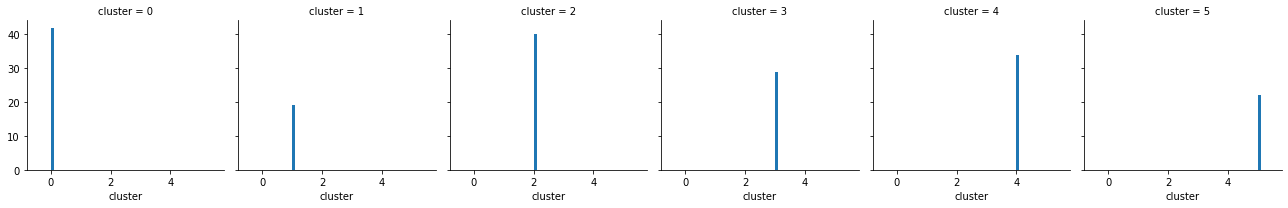

In [29]:
for c in clusters:
    grid= sns.FacetGrid(clusters, col='cluster')
    grid.map(plt.hist, c)

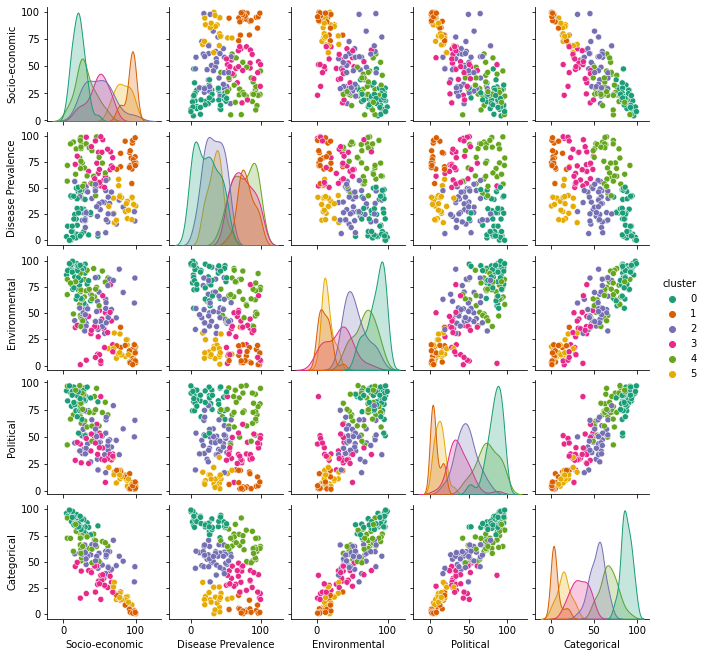

In [30]:
# Call Seaborn's pairplot to visualize our KMeans clustering on the PCA projected data

clustered_pairplot = sns.pairplot(clusters, hue='cluster', palette= 'Dark2', diag_kind='kde',size=1.85)

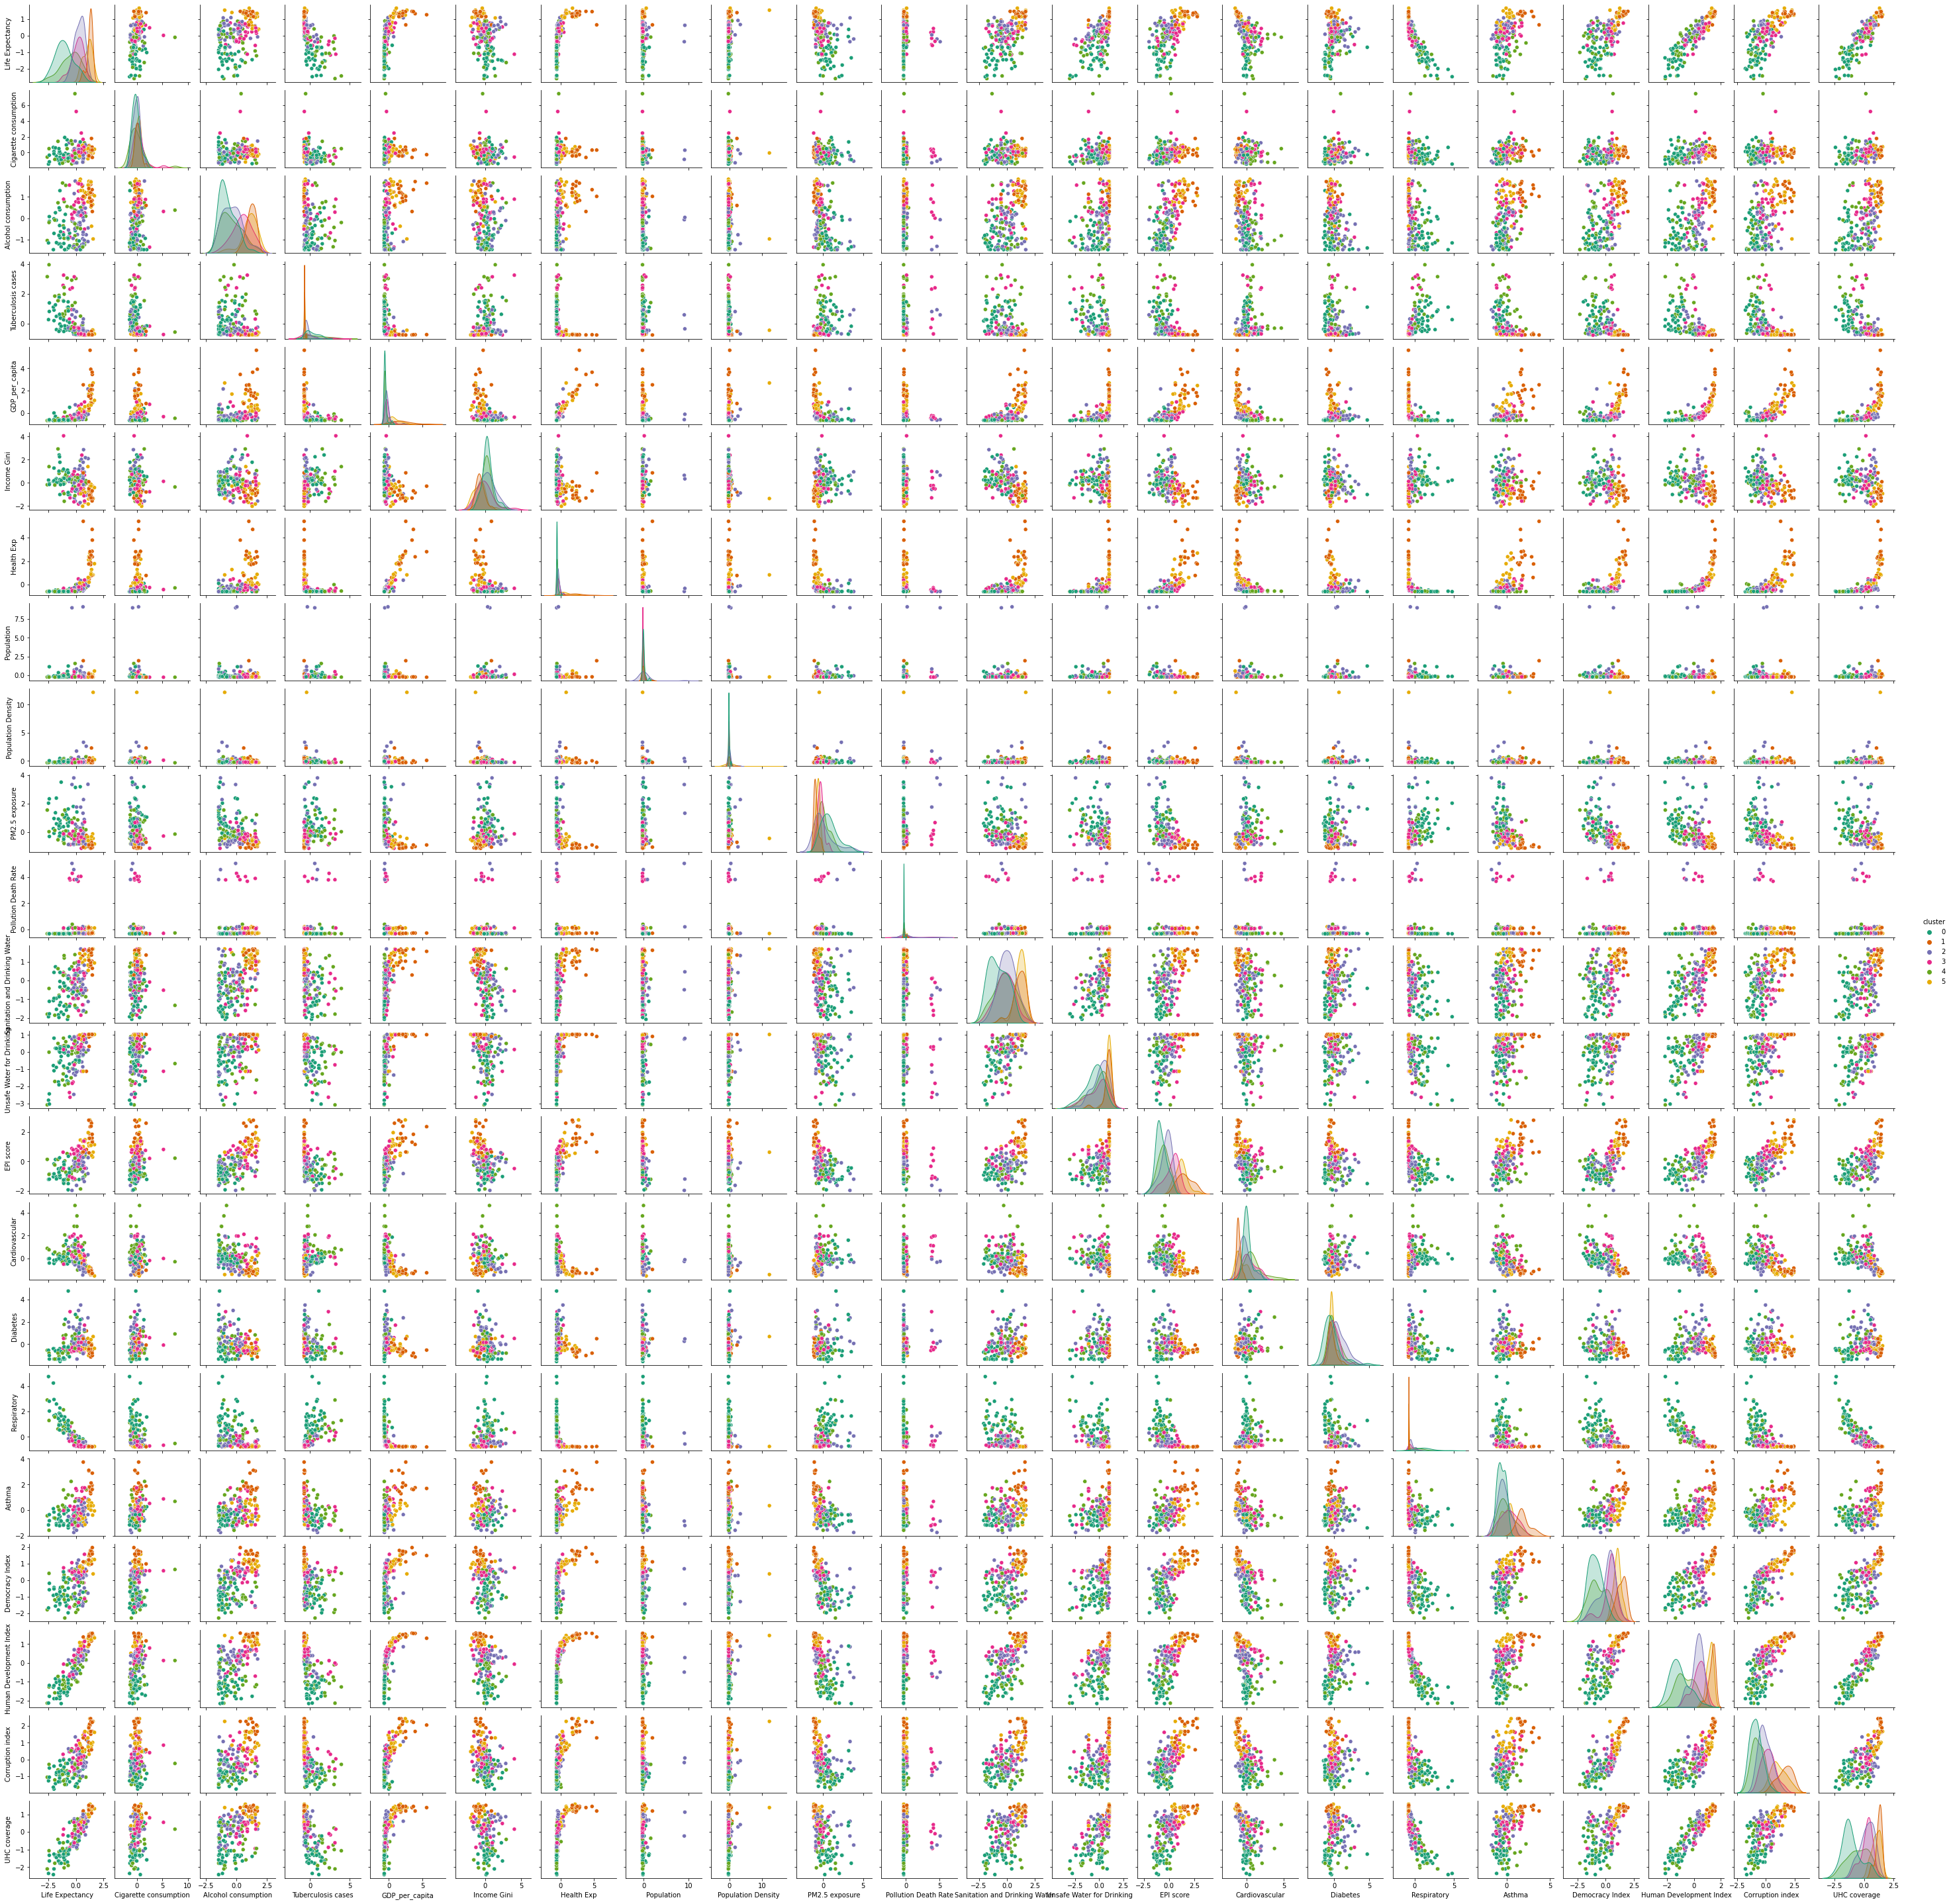

In [35]:
# Call Seaborn's pairplot to visualize our KMeans clustering on the PCA projected data

clustered_pairplot = sns.pairplot(pd.concat([total_df, pd.DataFrame({'cluster':labels})], axis=1), 
                                  hue='cluster', palette= 'Dark2', diag_kind='kde',size=1.85)
clustered_pairplot.figure.savefig("clustered_pairplot_out (6 clusters).png")

In [37]:
data_with_cl = pd.concat([total_df, pd.DataFrame({'cluster':labels}), countries['Country code']], axis=1)

In [38]:
covid = pd.read_csv('datasets/covid data.csv')

In [39]:
covid = covid.dropna()

In [40]:
combo = combo[combo['iso'].isin(covid['Country code'])]

In [41]:
combo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181 entries, 0 to 185
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Socio-economic      181 non-null    float64
 1   Disease Prevalence  181 non-null    float64
 2   Environmental       181 non-null    float64
 3   Political           181 non-null    float64
 4   Categorical         181 non-null    float64
 5   iso                 181 non-null    object 
dtypes: float64(5), object(1)
memory usage: 9.9+ KB


In [42]:
from sklearn import linear_model
import statsmodels.api as sm

x = combo.iloc[:,:4]
#y = covid['cases per pop']
y = combo.Categorical

model = sm.OLS(y, x).fit()
predictions = model.predict(x) 
 
print_model = model.summary()
print(print_model)

                                 OLS Regression Results                                
Dep. Variable:            Categorical   R-squared (uncentered):                   0.986
Model:                            OLS   Adj. R-squared (uncentered):              0.986
Method:                 Least Squares   F-statistic:                              3106.
Date:                Tue, 27 Sep 2022   Prob (F-statistic):                   1.02e-162
Time:                        13:42:55   Log-Likelihood:                         -606.23
No. Observations:                 181   AIC:                                      1220.
Df Residuals:                     177   BIC:                                      1233.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

In [43]:
x = x.drop(columns = ["Socio-economic"])

model = sm.OLS(y, x).fit()
predictions = model.predict(x) 
 
print_model = model.summary()
print(print_model)

                                 OLS Regression Results                                
Dep. Variable:            Categorical   R-squared (uncentered):                   0.986
Model:                            OLS   Adj. R-squared (uncentered):              0.986
Method:                 Least Squares   F-statistic:                              4164.
Date:                Tue, 27 Sep 2022   Prob (F-statistic):                   1.46e-164
Time:                        13:47:16   Log-Likelihood:                         -606.23
No. Observations:                 181   AIC:                                      1218.
Df Residuals:                     178   BIC:                                      1228.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------